Importing neceassary libraries

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading csv file as pandas dataframe

In [4]:
df = pd.read_csv('House Price India.csv')
df.shape

(30, 3)

In [5]:
df.head(10)

,number of bedrooms,living area,Price
0,5,3650,2380000
1,4,2920,1400000
2,5,2910,1200000
3,4,3310,838000
4,3,2710,805000
5,3,2600,790000
6,5,3660,785000
7,3,2240,750000
8,3,2390,750000
9,4,2200,698000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   number of bedrooms  30 non-null     int64
 1   living area         30 non-null     int64
 2   Price               30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


All the three features are integers, hence no need to change dtypes

In [33]:
df.nunique()

number of bedrooms     4
living area           24
Price                 27
dtype: int64

In [31]:
df.isna().sum()

number of bedrooms    0
living area           0
Price                 0
dtype: int64

There are no null values in the dataset

Text(0.5, 1.0, 'Price vs living area')

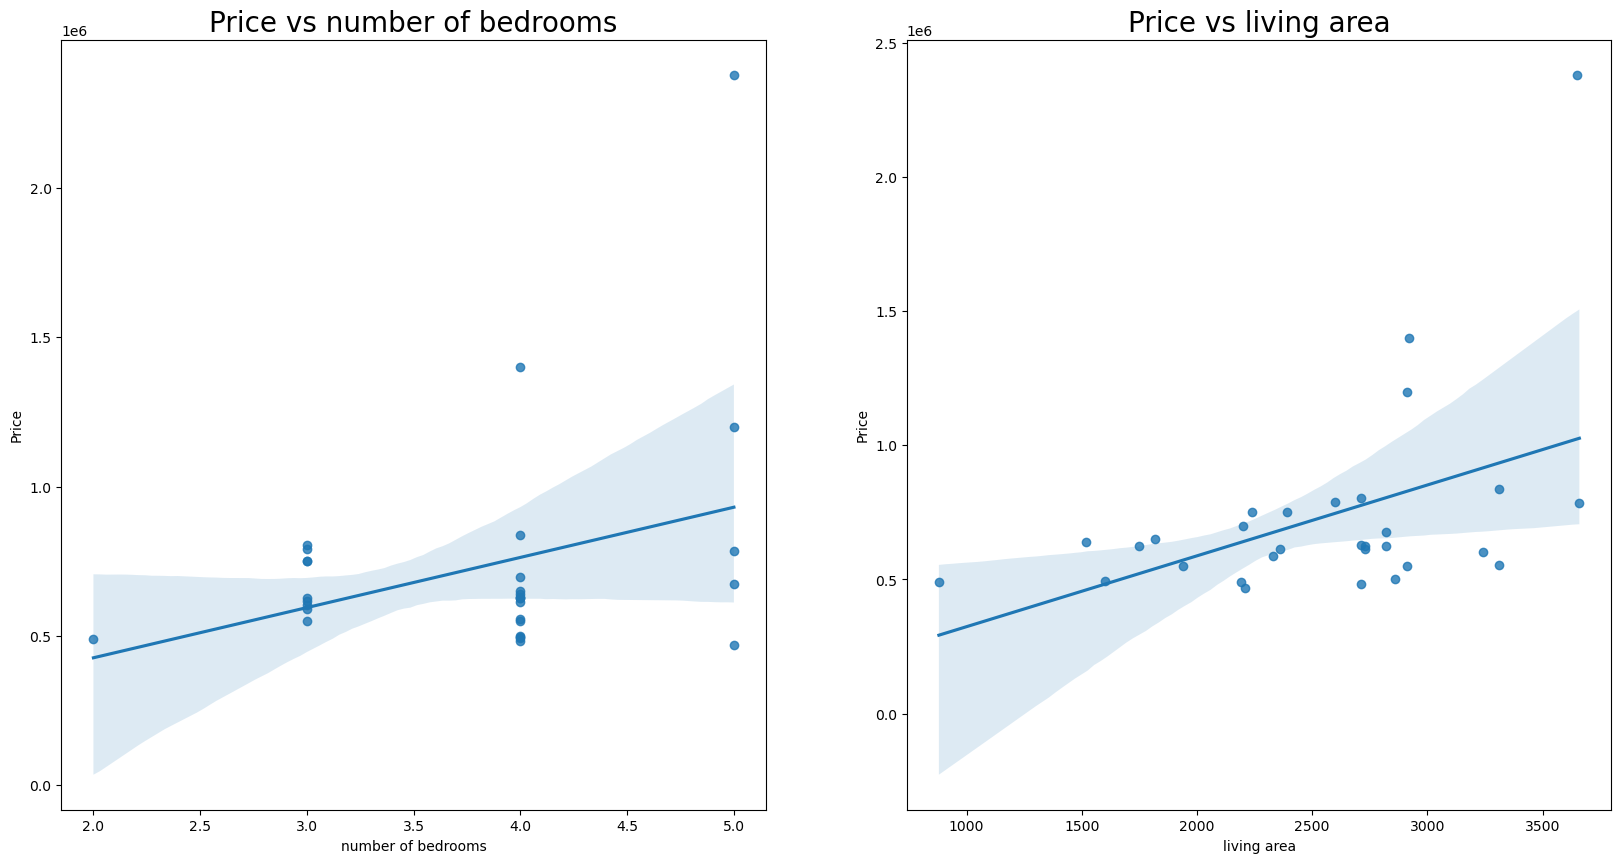

In [27]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x='number of bedrooms',y='Price',data=df,ax=ax[0])
ax[0].set_title('Price vs number of bedrooms',size=20)
sns.regplot(x='living area',y='Price',data=df,ax=ax[1])
ax[1].set_title('Price vs living area',size=20)

The slope of the regression line in both plots suggest that both of the features(number of bedrooms and living area) have a positive but very less coorelation with the target variable (Price)

In [29]:
corr_ = df.corr()
corr_

,number of bedrooms,living area,Price
number of bedrooms,1.000000,0.439438,0.345184
living area,0.439438,1.000000,0.452251
Price,0.345184,0.452251,1.000000


<AxesSubplot:>

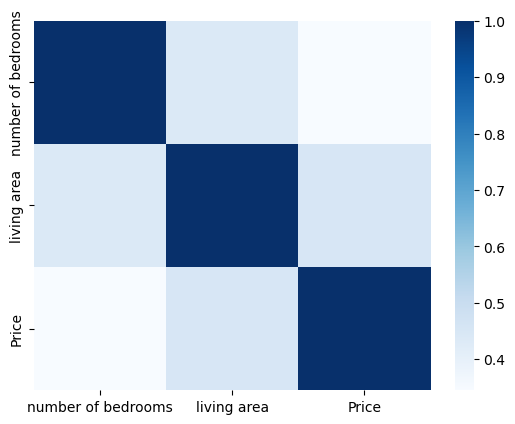

In [16]:
sns.heatmap(df.corr(),cmap = 'Blues')

The above heatmap shows the same

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20276\3701090501.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels=list(range(0,17,2)),size=20)


Text(0.5, 1.0, 'Mean prices per no. of bedrooms')

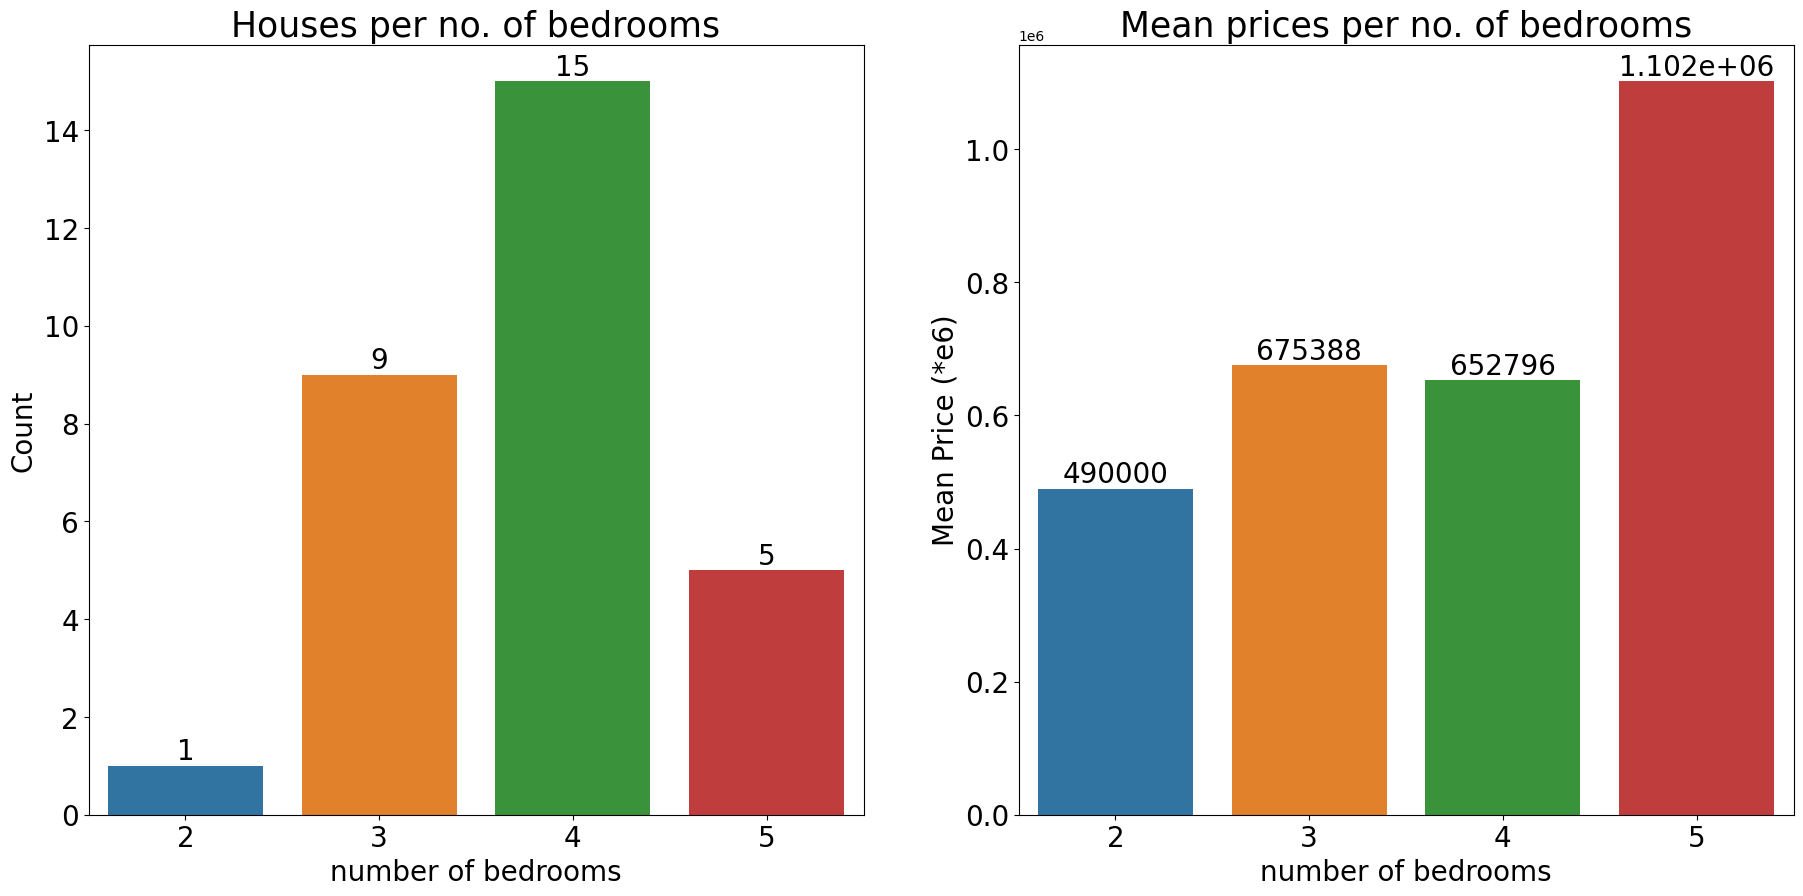

In [107]:
fig, ax = plt.subplots(1,2,figsize=(22,10))
sns.countplot(x='number of bedrooms',data=df,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,size=20)
ax[0].set_xticklabels(labels = df['number of bedrooms'].unique()[::-1],size=20)
ax[0].set_yticklabels(labels=list(range(0,17,2)),size=20)
ax[0].set_xlabel('number of bedrooms',size=20)
ax[0].set_ylabel('Count',size=20)
ax[0].set_title('Houses per no. of bedrooms',size=25)
df_by_bedrooms = df.groupby('number of bedrooms',as_index=False).mean()
df_by_bedrooms['Price'] = df_by_bedrooms['Price'].astype('int64')
sns.barplot(x='number of bedrooms',y='Price',data=df_by_bedrooms,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,size=20)
ax[1].set_xticklabels(labels = df['number of bedrooms'].unique()[::-1],size=20)
plt.yticks(fontsize=20)
ax[1].set_xlabel('number of bedrooms',size=20)
ax[1].set_ylabel('Mean Price (*e6)',size=20)
ax[1].set_title('Mean prices per no. of bedrooms',size=25)

Insights:
<br>
1) Houses with 4 number of bedrooms are the highest in number.
<br>
2) Naturally, houses with 5 number of bedrooms have the highest prices

In [105]:
linreg = LinearRegression()
X = df.drop('Price',axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [110]:
linreg.fit(X_train,y_train)

LinearRegression()

In [112]:
y_pred = linreg.predict(X_test)
y_pred

array([ 51972.75248054, 854398.73583858, 767133.6454967 , 604236.14951988,
       613121.46748226, 670768.83128289, 821819.23664321, 866245.82645507])

In [124]:
y_test.values

array([490000, 625000, 550000, 615000, 750000, 698000, 482000, 499950],
      dtype=int64)

In [141]:
linreg.coef_

array([113921.04422899,    296.17726541])

In [142]:
linreg.intercept_

-436505.32954035

Using the slopes(coefficents) and intercept, the linear equation for prices with number of houses and living area can be easily determined 

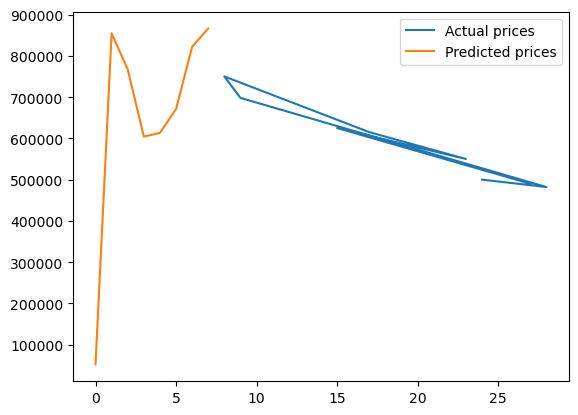

In [139]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual prices','Predicted prices'])

The above plot indicates that there is huge difference between predicted prices and actual prices

In [130]:
mae = mean_absolute_error(y_test,y_pred)
mae

220693.53045849944

In [132]:
r2 = r2_score(y_test,y_pred)
r2

-6.958659128700069

Since MAE is too high and r2 score is negative, it is safe to say that linear regression is a really poor model choice for this problem statement 